# Gramener Case Study 

In [499]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [500]:
# Import the numpy and pandas packages
import numpy as np
import pandas as pd

# Import libraries for plot
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set(style="darkgrid")

### Read and inspect data from loan.csv file

In [501]:
# import loan.csv file
loan = pd.read_csv("loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [502]:
# inspecting data like column names, shape and datatype of each column
print(loan.columns)
print(loan.shape)
print(loan.dtypes)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)
(39717, 111)
id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc             

### Data Cleaning and preparation

In [503]:
# Checking null values in each column
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [504]:
# We observe that most of the column has totally NA value. They are of no use in analysis.
# So, we need to remove those specific columns.

# To check the NA value in each column with percentage
print(round(100*(loan.isnull().sum())/len(loan.index), 2))

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

### Removing the columns which have more than 90 % missing values

We can see that 56 columns are of no use for us because of NA values. So, it is advised to drop such columns.


In [505]:
# Let's see which columns have more than 90% missing values or NA.

missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
missing_columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [506]:
# Removing such columns(having more than 90% missing values) as we can't do any analysis on based on them.

loan = loan.drop(missing_columns, axis=1)

In [507]:
# Let's see how our dataset looks after removing such columns. 
# Checking the shape of dataset.

loan.shape

(39717, 55)

In [508]:
# If a column has only only one value like 0 for all the rows. We cannot use it because it won't lead us to any conclusion.
# Let's see if we have any such columns.

loan.apply(pd.Series.nunique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [509]:
# Turns out we have some. 
# Let's remove the columns which have only one unique value. As we can't do analysis on single unique value.

loan = loan.loc[:,loan.apply(pd.Series.nunique) != 1]

In [510]:
# Check for number of unique values in each column after modification.

loan.apply(pd.Series.nunique)

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
open_acc                      40
pub_rec                        5
revol_bal 

In [511]:
# Let's check shape again to see how many columns are left after deleting columns with a single unique value.

loan.shape

(39717, 46)

In [512]:
# Checking percentage of missing values in each column again.

print(round(100*(loan.isnull().sum())/len(loan.index), 2))

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
open_acc                    0.00
pub_rec                     0.00
revol_bal 

In [513]:
# desc column has large numbrr of NA values 
# And this column is not usefull from analysis point of view 
# So let's drop this column 
# Also there are few other columns as well
# which are not important from analysis point of view
# So let's remove them as well

loan = loan.drop(['url','desc','emp_title','member_id','title','zip_code','out_prncp','out_prncp_inv'], axis=1)

#### Now "mths_since_last_delinq" column has large number of NA values
#### And here NA means person has never commited crime
#### So let's keep this as it is for now 
#### And replace NA with never at the time of analysis
#### Because replacing here can cause some calculation issues at the time of analysis 

In [514]:
# Filling NA with 0 in column emp_length.

loan['emp_length'].fillna(0, inplace=True)

In [515]:
# Let's check percentage of missing values in each column again.

print(round(100*(loan.isnull().sum())/len(loan.index), 2))

id                          0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_length                  0.00
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
purpose                     0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
open_acc                    0.00
pub_rec                     0.00
revol_bal                   0.00
revol_util                  0.13
total_acc                   0.00
total_pymnt                 0.00
total_pymnt_inv             0.00
total_rec_prncp             0.00
total_rec_

In [516]:
# Let's check shape of data frame again to see how many columns are left.

loan.shape

(39717, 38)

In [517]:
# Let's drop all duplicate values in row.
loan=loan.drop_duplicates() 

# And check data frame shape again
loan.shape

(39717, 38)

In [518]:
# Now see the data set once to see if there is any other cleaning left

loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [519]:
# As some columns have string parameter and we have to do analysis on them.
# It's better to convert them in same case to avoid any data issues in future

loan=loan.apply(lambda x: x.str.upper() if(x.dtype == 'object') else x)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 MONTHS,10.65%,162.87,B,B2,10+ YEARS,...,5833.84,5000.00,863.16,0.00,0.00,0.00,JAN-15,171.62,MAY-16,0.0
1,1077430,2500,2500,2500.0,60 MONTHS,15.27%,59.83,C,C4,< 1 YEAR,...,1008.71,456.46,435.17,0.00,117.08,1.11,APR-13,119.66,SEP-13,0.0
2,1077175,2400,2400,2400.0,36 MONTHS,15.96%,84.33,C,C5,10+ YEARS,...,3005.67,2400.00,605.67,0.00,0.00,0.00,JUN-14,649.91,MAY-16,0.0
3,1076863,10000,10000,10000.0,36 MONTHS,13.49%,339.31,C,C1,10+ YEARS,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,JAN-15,357.48,APR-16,0.0
4,1075358,3000,3000,3000.0,60 MONTHS,12.69%,67.79,B,B5,1 YEAR,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,MAY-16,67.79,MAY-16,0.0


In [520]:
# checking the data types

loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 38 columns):
id                         39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
purpose                    39717 non-null object
addr_state                 39717 non-null object
dti                        39717 non-null float64
delinq_2

In [521]:
# Now int_rate is character type, let's convert it to float
# also it contains % so splitting to only numeric part

loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan['revol_util'] = loan.loc[~pd.isnull(loan['revol_util']), 'revol_util'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

# Coverting the date values to datetime format
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format='%b-%y')
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'], format='%b-%y')

In [522]:
# Checking the data types again after modification

loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 38 columns):
id                         39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null datetime64[ns]
loan_status                39717 non-null object
purpose                    39717 non-null object
addr_state                 39717 non-null object
dti                        39717 non-null float64

In [523]:
# Again data inspection, now we have usefull data it is ready for analysis lets go ahead.

loan.shape

(39717, 38)

# Univariate Analysis

In [524]:
# let's have a look at data set first.

loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 MONTHS,10.65,162.87,B,B2,10+ YEARS,...,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,2500,2500,2500.0,60 MONTHS,15.27,59.83,C,C4,< 1 YEAR,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,2400,2400,2400.0,36 MONTHS,15.96,84.33,C,C5,10+ YEARS,...,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,10000,10000,10000.0,36 MONTHS,13.49,339.31,C,C1,10+ YEARS,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,1075358,3000,3000,3000.0,60 MONTHS,12.69,67.79,B,B5,1 YEAR,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0


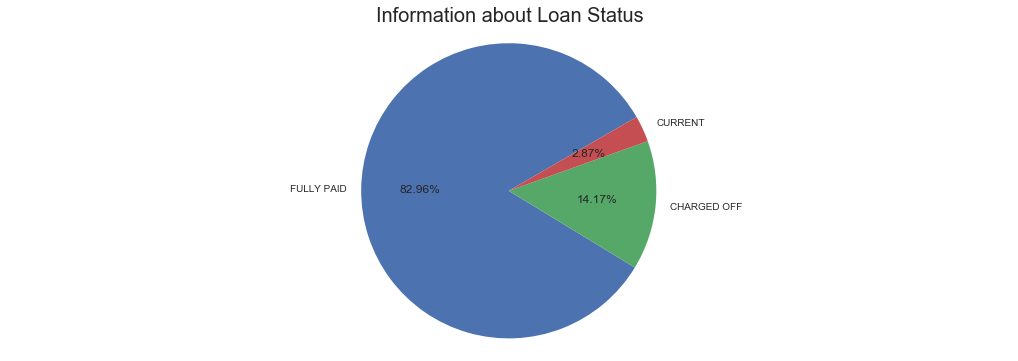

In [525]:
# First let's have a look at percentage of different loan status.

plt.figure(figsize=(18, 6))
loan_status_pie = pd.DataFrame(loan['loan_status'].value_counts())
plt.title('Information about Loan Status', fontsize = 20)
plt.pie(loan_status_pie['loan_status'].values, labels = loan_status_pie.index.values, autopct='%1.2f%%', shadow=False, startangle=30)
plt.axis('equal')
#plt.savefig("loan_status_percentage.png", bbox_inches='tight')
plt.show()

In [526]:
# For that we need to create a pivot table 
# having percentage change in loan status based on different parameter
# function to create pivot table for percentage value of loan_status based on variable passed

def loanstatus_pivot_percent(variable):
    pivot_variable = pd.pivot_table(loan, values=["id"], index=[variable], columns=["loan_status"],
                            aggfunc=len, margins=True,dropna=True,fill_value=0)
    percent_table = pivot_variable.div( pivot_variable.iloc[:,-1]/100, axis=0 )
    percent_table = percent_table.round(2)
    return percent_table

In [527]:
# function to create stacked graph for 
# percentage value of loan_status based on variable passed

def loanstatus_percent_stackchart(variable,size):
    pivot_variable = pd.pivot_table(loan, values=["id"], index=[variable], columns=["loan_status"],
                            aggfunc=len, margins=True,dropna=True,fill_value=0)
    percent_table = pivot_variable.div( pivot_variable.iloc[:,-1]/100, axis=0 )
    if size=='large':
        plt.figure(figsize=(30, 20))
    
    else:
        plt.figure(figsize=(10, 8))
    
    
    barWidth = 0.85
    plt.bar(percent_table.index, percent_table.iloc[:,0], 
        color='#b5ffb9', edgecolor='white', width=barWidth,label="charged off")
    plt.bar(percent_table.index, percent_table.iloc[:,1], bottom=percent_table.iloc[:,0], 
        color='#f9bc86',edgecolor='white', width=barWidth,label="current")
    plt.bar(percent_table.index, percent_table.iloc[:,2], 
        bottom=[i+j for i,j in zip(percent_table.iloc[:,0], percent_table.iloc[:,1])], 
        color='#a3acff',edgecolor='white', width=barWidth,label="fully paid")
    plt.xlabel(variable)
    plt.ylabel('Percentage distribution')
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    #plt.savefig("{}.png".format(variable), bbox_inches='tight')
    plt.show()
    

#### Analyse loan_status based on grade

In [528]:
# Create pivot table using function to show percentage of different loan_status

loan_grade=loanstatus_pivot_percent("grade")
loan_grade

id                          
loan_status CHARGED OFF CURRENT FULLY PAID    All
grade                                            
A                  5.97    0.40      93.63  100.0
B                 11.86    2.87      85.27  100.0
C                 16.63    3.26      80.11  100.0
D                 21.07    4.18      74.75  100.0
E                 25.16    6.30      68.54  100.0
F                 30.41    6.96      62.63  100.0
G                 31.96    5.38      62.66  100.0
All               14.17    2.87      82.96  100.0

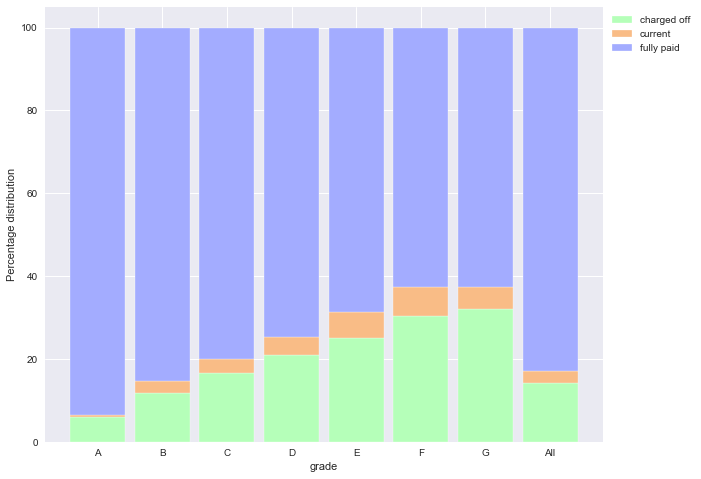

In [529]:
# Create percentage plot using fuction

loanstatus_percent_stackchart('grade','small')

#### Analyse loan status based on sub grade.

In [530]:
# Create pivot table using function to show percentage of different loan_status

loan_sub_grade=loanstatus_pivot_percent("sub_grade")
loan_sub_grade

id                          
loan_status CHARGED OFF CURRENT FULLY PAID    All
sub_grade                                        
A1                 2.63    0.00      97.37  100.0
A2                 4.91    0.00      95.09  100.0
A3                 5.69    0.00      94.31  100.0
A4                 6.17    0.45      93.38  100.0
A5                 7.91    0.98      91.10  100.0
B1                 9.34    1.80      88.85  100.0
B2                11.08    2.72      86.19  100.0
B3                11.69    3.15      85.16  100.0
B4                13.10    2.99      83.92  100.0
B5                13.17    3.29      83.54  100.0
C1                15.73    3.79      80.48  100.0
C2                15.96    3.98      80.06  100.0
C3                17.66    2.68      79.66  100.0
C4                17.15    2.43      80.42  100.0
C5                17.54    2.70      79.76  100.0
D1                17.94    0.00      82.06  100.0
D2                20.10    4.60      75.30  100.0
D3                21.82    4.86      73.32  100.0
D4                21.92    6.42      71.66  100.0
D5                23.91    4.58      71.51  100.0
E1                25.95    5.37      68.68  100.0
E2                24.85    6.40      68.75  100.0
E3                21.52    6.69      71.79  100.0
E4                27.75    6.61      65.64  100.0
E5                26.20    6.97      66.83  100.0
F1                27.66    7.29      65.05  100.0
F2                28.11    6.43      65.46  100.0
F3                27.57    5.95      66.49  100.0
F4                31.55   10.12      58.33  100.0
F5                45.76    4.24      50.00  100.0
G1                29.81    9.62      60.58  100.0
G2                35.90    1.28      62.82  100.0
G3                39.58    6.25      54.17  100.0
G4                23.21    3.57      73.21  100.0
G5                33.33    3.33      63.33  100.0
All               14.17    2.87      82.96  100.0

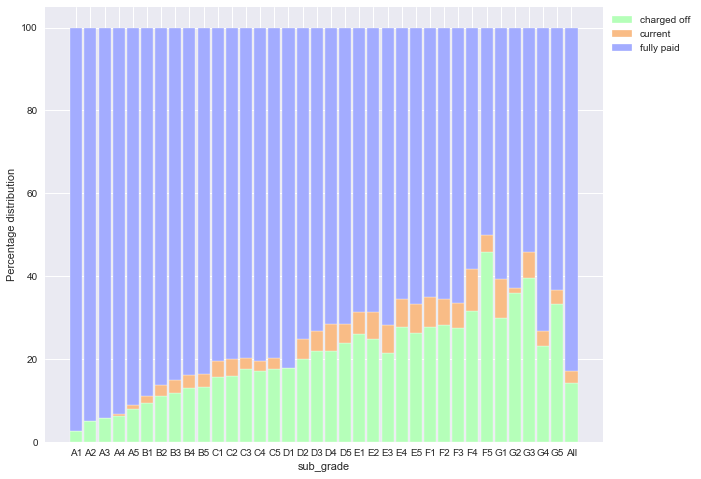

In [531]:
# Create loan status percentage plot based on sub_grade

loanstatus_percent_stackchart('sub_grade','small')

#### Analyse loan_status based on home_ownership

In [532]:
# Create pivot table using function to show percentage of different loan_status

loan_home_ownership=loanstatus_pivot_percent("home_ownership")
loan_home_ownership

id                          
loan_status    CHARGED OFF CURRENT FULLY PAID    All
home_ownership                                      
MORTGAGE             13.18    3.61      83.21  100.0
NONE                  0.00    0.00     100.00  100.0
OTHER                18.37    0.00      81.63  100.0
OWN                  14.49    2.71      82.80  100.0
RENT                 15.02    2.22      82.76  100.0
All                  14.17    2.87      82.96  100.0

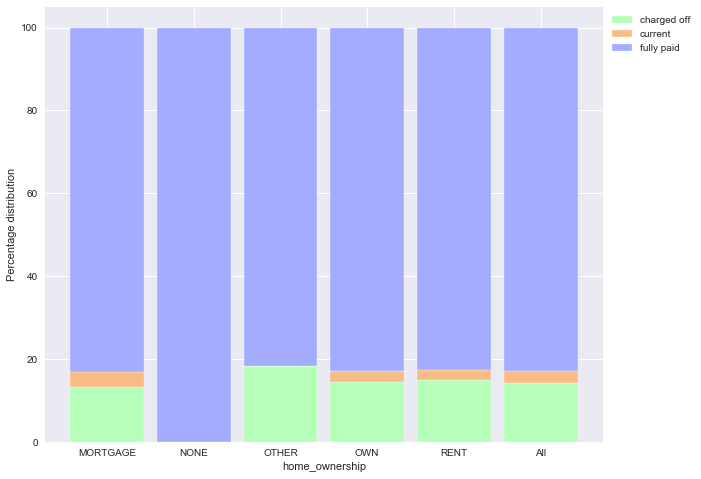

In [533]:
# Create loan status percentage plot based on home_ownership

loanstatus_percent_stackchart('home_ownership','small')

#### Analyse loan_status based on  addr_state

In [534]:
# Create pivot table using function to show percentage of different loan_status

loan_addr_state=loanstatus_pivot_percent("addr_state")
loan_addr_state

id                          
loan_status CHARGED OFF CURRENT FULLY PAID    All
addr_state                                       
AK                18.75    2.50      78.75  100.0
AL                11.95    3.76      84.29  100.0
AR                11.02    4.08      84.90  100.0
AZ                13.99    3.41      82.59  100.0
CA                15.85    2.11      82.04  100.0
CO                12.37    3.28      84.34  100.0
CT                12.52    3.33      84.15  100.0
DC                 7.01    1.40      91.59  100.0
DE                10.53    0.88      88.60  100.0
FL                17.59    2.97      79.45  100.0
GA                15.38    2.79      81.83  100.0
HI                16.09    4.60      79.31  100.0
IA                 0.00    0.00     100.00  100.0
ID                16.67    0.00      83.33  100.0
IL                12.92    3.08      84.00  100.0
IN                 0.00    0.00     100.00  100.0
KS                11.44    5.90      82.66  100.0
KY                13.85    4.31      81.85  100.0
LA                12.16    2.06      85.78  100.0
MA                11.87    3.21      84.93  100.0
MD                15.44    2.48      82.08  100.0
ME                 0.00    0.00     100.00  100.0
MI                14.31    2.22      83.47  100.0
MN                13.17    1.63      85.20  100.0
MO                16.62    2.33      81.05  100.0
MS                10.53    0.00      89.47  100.0
MT                12.94    2.35      84.71  100.0
NC                14.47    4.82      80.71  100.0
NE                60.00    0.00      40.00  100.0
NH                14.62    2.92      82.46  100.0
NJ                15.03    3.24      81.73  100.0
NM                15.87    3.17      80.95  100.0
NV                21.73    3.62      74.65  100.0
NY                12.99    2.99      84.02  100.0
OH                12.67    3.68      83.65  100.0
OK                13.38    4.01      82.61  100.0
OR                15.74    3.55      80.71  100.0
PA                11.87    3.23      84.90  100.0
RI                12.63    2.02      85.35  100.0
SC                13.98    2.75      83.26  100.0
SD                18.75    3.12      78.12  100.0
TN                11.76    0.00      88.24  100.0
TX                11.59    2.49      85.92  100.0
UT                15.50    2.33      82.17  100.0
VA                12.58    2.70      84.72  100.0
VT                11.11    1.85      87.04  100.0
WA                15.12    2.62      82.26  100.0
WI                13.70    4.35      81.96  100.0
WV                11.86    2.82      85.31  100.0
WY                 4.82    3.61      91.57  100.0
All               14.17    2.87      82.96  100.0

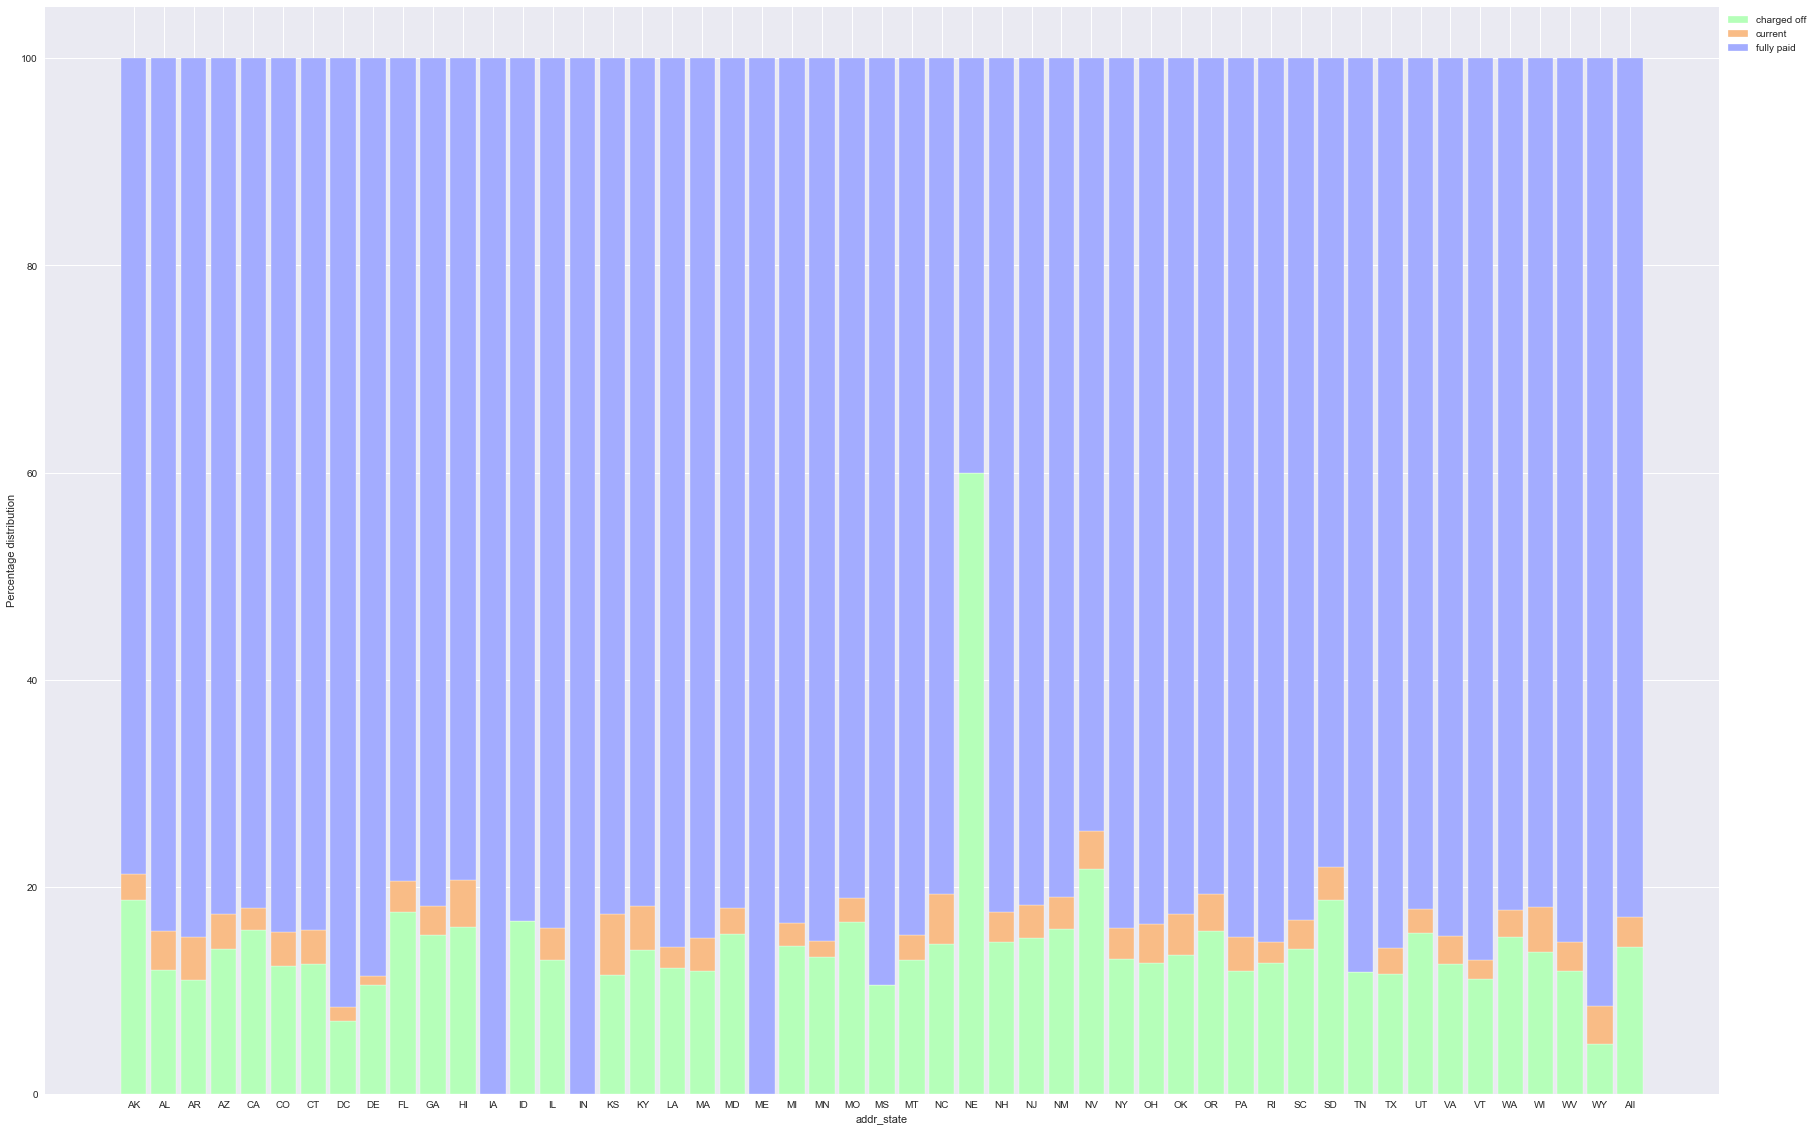

In [535]:
# Create loan status percentage plot based on addr_state

loanstatus_percent_stackchart('addr_state','large')

#### Analyse loan_status based on verification_status

In [536]:
# Create pivot table using function to show percentage of different loan_status

loan_verification_status=loanstatus_pivot_percent("verification_status")
loan_verification_status

id                          
loan_status         CHARGED OFF CURRENT FULLY PAID    All
verification_status                                      
NOT VERIFIED              12.66    1.34      86.00  100.0
SOURCE VERIFIED           14.36    3.10      82.54  100.0
VERIFIED                  16.01    4.71      79.28  100.0
All                       14.17    2.87      82.96  100.0

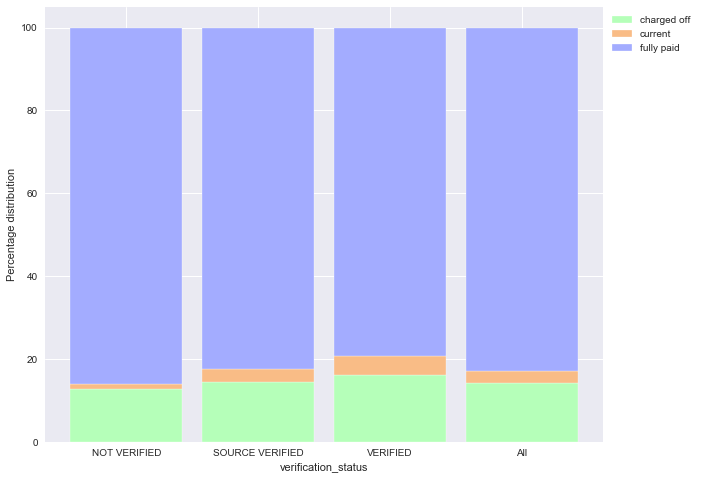

In [537]:
# Create loan status percentage plot based on verification_status

loanstatus_percent_stackchart('verification_status','small')

#### Analyse loan_status based on term

In [538]:
# Create pivot table using function to show percentage of different loan_status

loan_term=loanstatus_pivot_percent("term")
loan_term

id                          
loan_status CHARGED OFF CURRENT FULLY PAID    All
term                                             
 36 MONTHS        11.09    0.00      88.91  100.0
 60 MONTHS        22.60   10.73      66.67  100.0
All               14.17    2.87      82.96  100.0

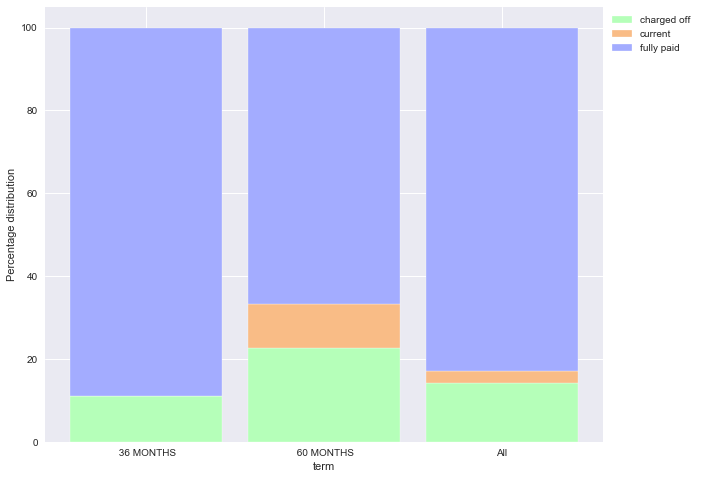

In [539]:
# Create loan status percentage plot based on term

loanstatus_percent_stackchart('term','small')

#### Analyse loan_status based on purpose

In [540]:
# create pivot table using function to show percentage of different loan_status

loan_purpose=loanstatus_pivot_percent("purpose")
loan_purpose

id                          
loan_status        CHARGED OFF CURRENT FULLY PAID    All
purpose                                                 
CAR                      10.33    3.23      86.44  100.0
CREDIT_CARD              10.57    2.01      87.43  100.0
DEBT_CONSOLIDATION       14.84    3.14      82.01  100.0
EDUCATIONAL              17.23    0.00      82.77  100.0
HOME_IMPROVEMENT         11.66    3.39      84.95  100.0
HOUSE                    15.49    3.67      80.84  100.0
MAJOR_PURCHASE           10.15    1.69      88.16  100.0
MEDICAL                  15.30    1.73      82.97  100.0
MOVING                   15.78    1.20      83.02  100.0
OTHER                    15.85    3.21      80.94  100.0
RENEWABLE_ENERGY         18.45    0.97      80.58  100.0
SMALL_BUSINESS           25.98    4.05      69.97  100.0
VACATION                 13.91    1.57      84.51  100.0
WEDDING                  10.14    2.22      87.65  100.0
All                      14.17    2.87      82.96  100.0

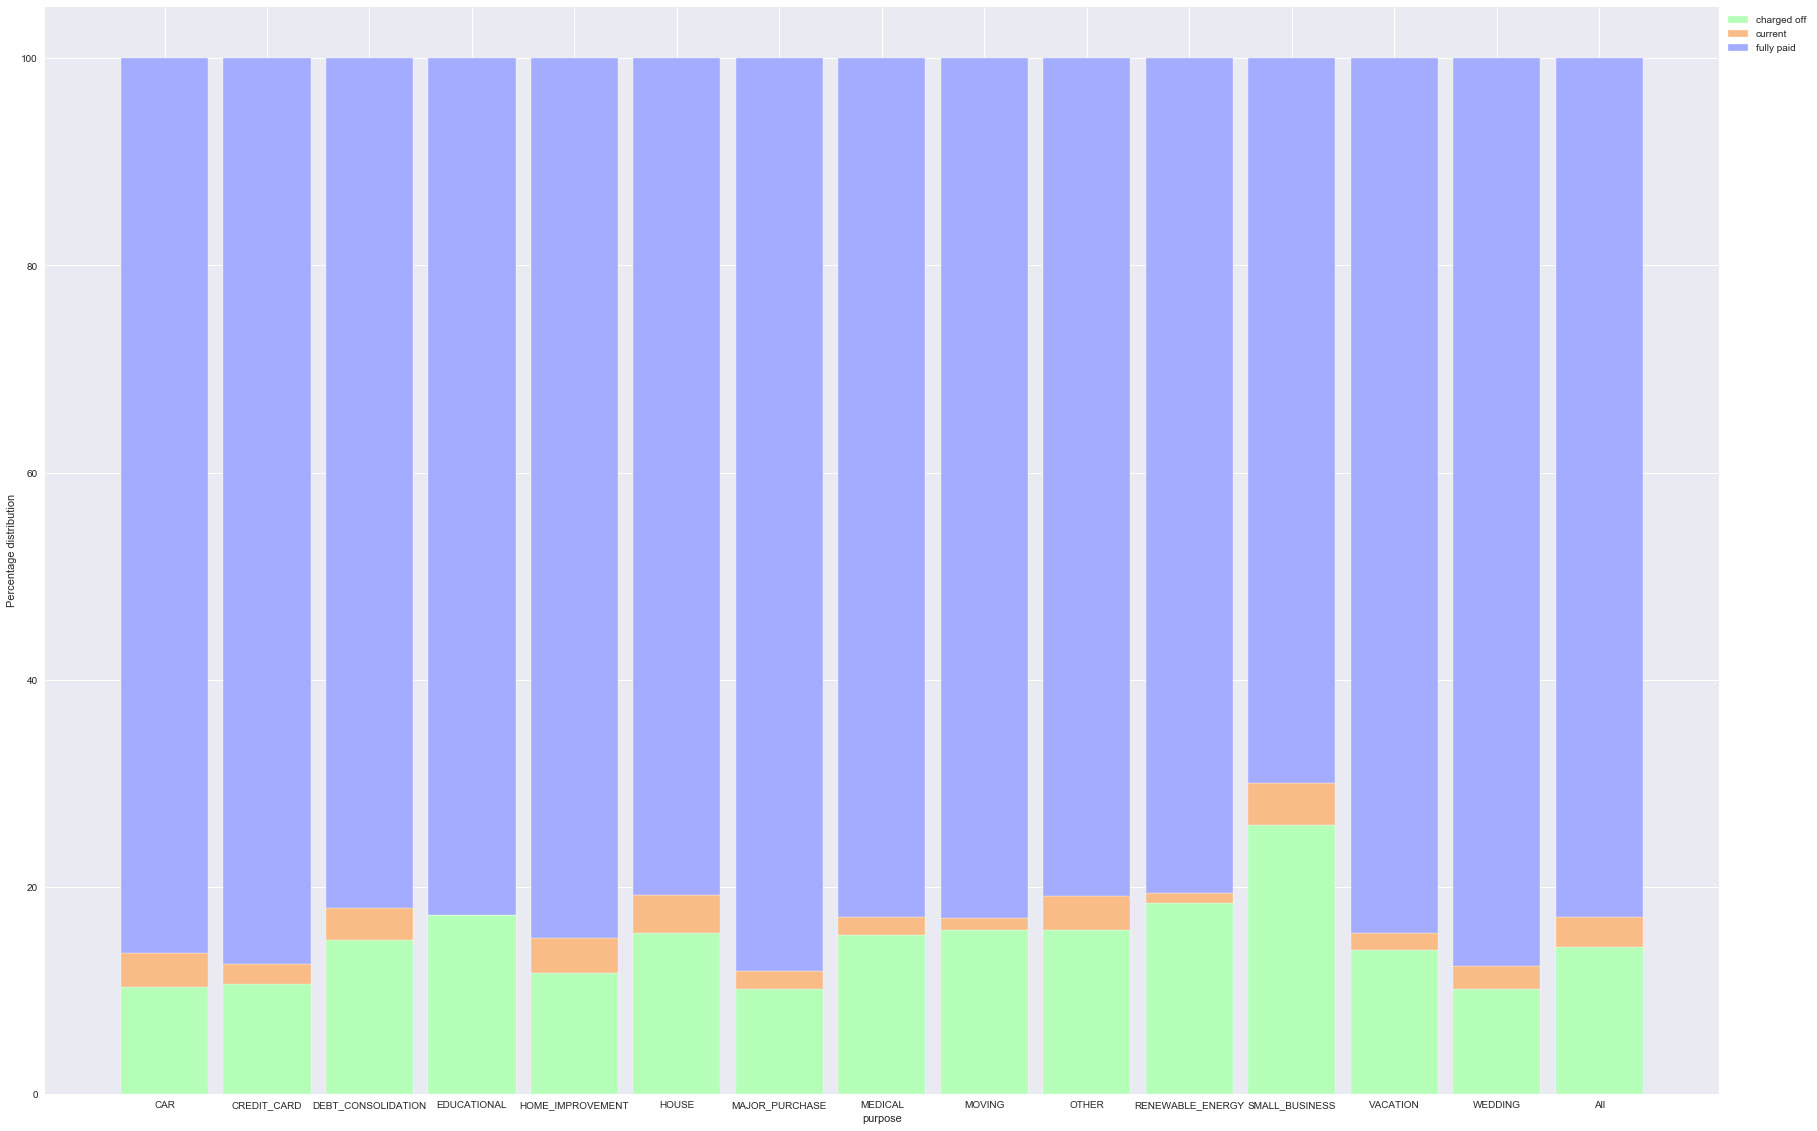

In [541]:
# create loan status percentage plot based on purpose

loanstatus_percent_stackchart('purpose','large')

#### Analyse loan_status based on emp_length

In [542]:
# create pivot table using function to show percentage of different loan_status

loan_emp_length=loanstatus_pivot_percent("emp_length")
loan_emp_length

id                          
loan_status CHARGED OFF CURRENT FULLY PAID    All
emp_length                                       
1 YEAR            14.07    2.19      83.73  100.0
10+ YEARS         14.99    4.40      80.61  100.0
2 YEARS           12.92    2.21      84.87  100.0
3 YEARS           13.55    2.03      84.42  100.0
4 YEARS           13.45    2.74      83.82  100.0
5 YEARS           13.95    2.68      83.36  100.0
6 YEARS           13.77    2.74      83.49  100.0
7 YEARS           14.83    3.50      81.67  100.0
8 YEARS           13.73    2.97      83.30  100.0
9 YEARS           12.56    2.54      84.90  100.0
< 1 YEAR          13.94    1.64      84.42  100.0
All               13.97    2.84      83.19  100.0

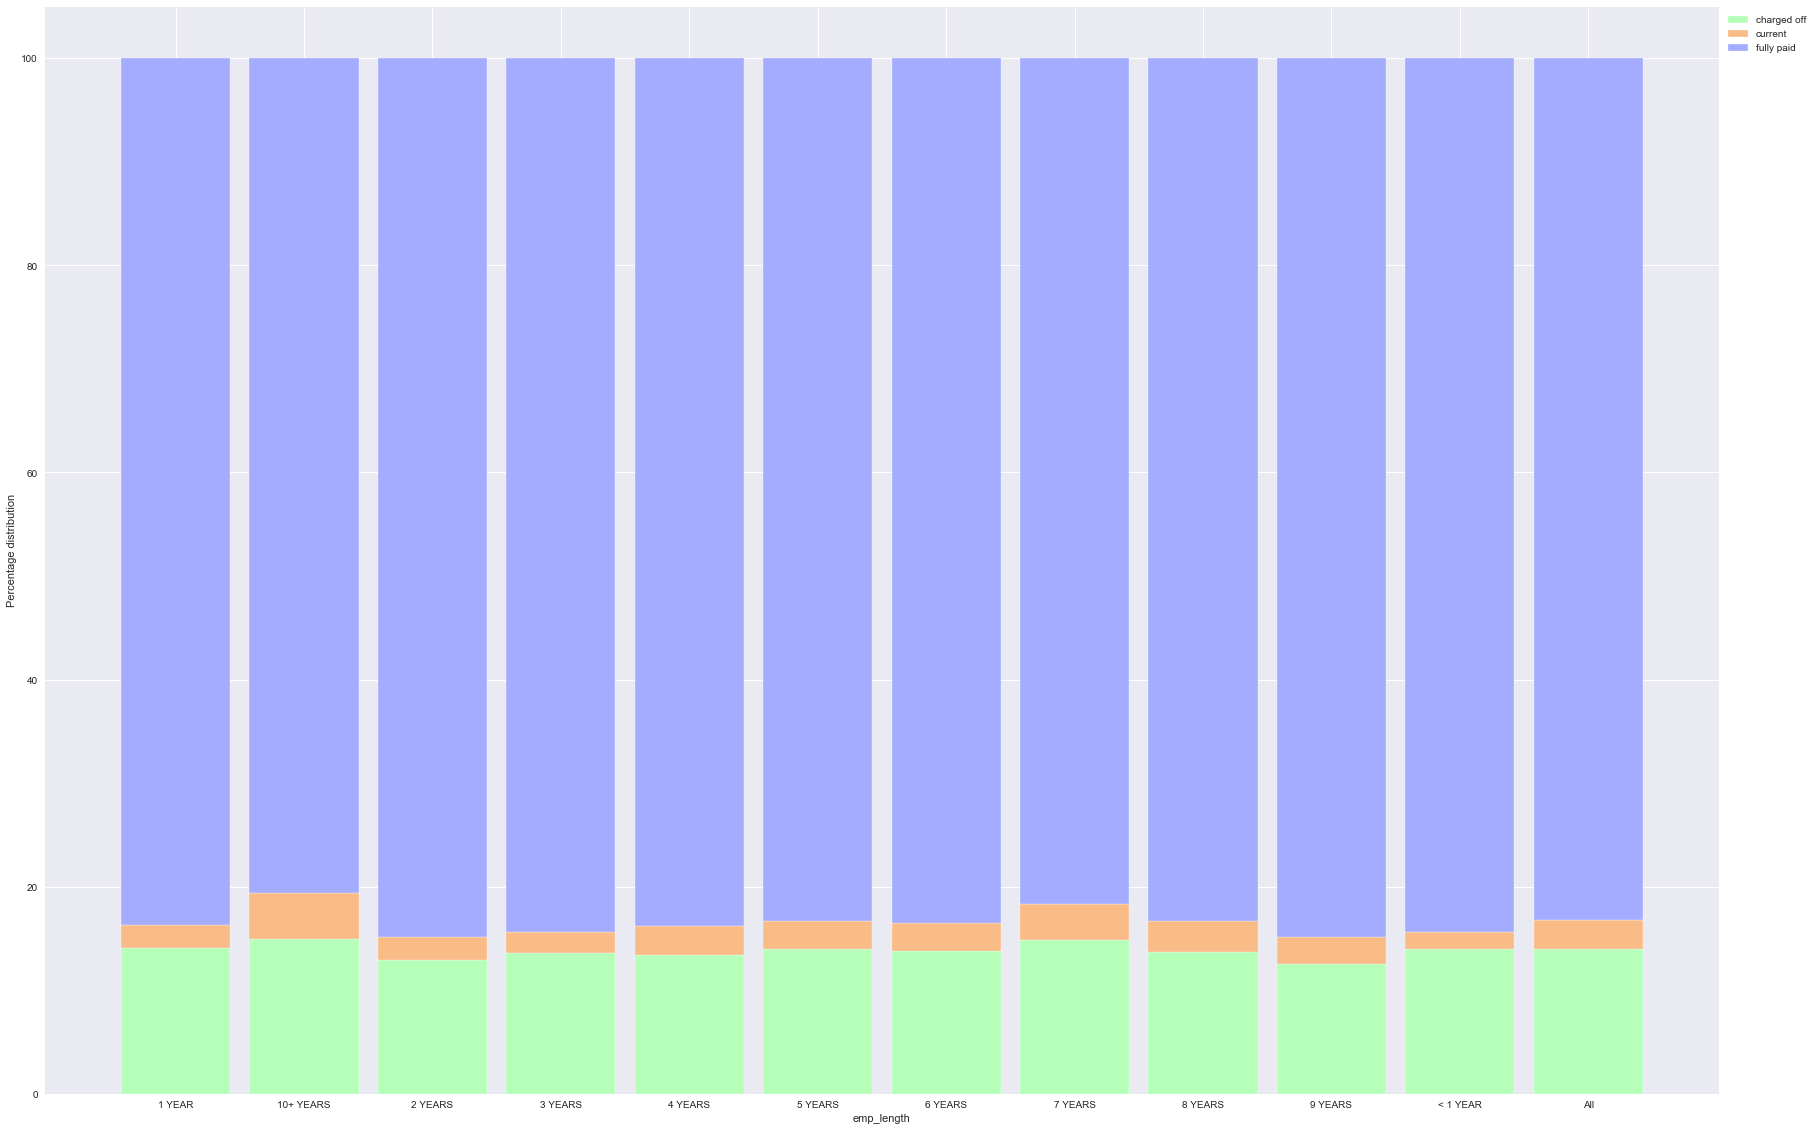

In [543]:
# create loan status percentage plot based on purpose

loanstatus_percent_stackchart('emp_length','large')

#### Analyse loan_status based on interest rate quartile

In [544]:
# create new column int_rate_bin
# which has values based on quartile 

print(pd.cut(loan['int_rate'], 3).value_counts())
loan['int_rate_bin'] = pd.cut(loan['int_rate'], 3, labels=['low','medium','high'])
loan.head()

(5.401, 11.81]    19611
(11.81, 18.2]     17638
(18.2, 24.59]      2468
Name: int_rate, dtype: int64


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_bin
0,1077501,5000,5000,4975.0,36 MONTHS,10.65,162.87,B,B2,10+ YEARS,...,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,low
1,1077430,2500,2500,2500.0,60 MONTHS,15.27,59.83,C,C4,< 1 YEAR,...,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,medium
2,1077175,2400,2400,2400.0,36 MONTHS,15.96,84.33,C,C5,10+ YEARS,...,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,medium
3,1076863,10000,10000,10000.0,36 MONTHS,13.49,339.31,C,C1,10+ YEARS,...,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,medium
4,1075358,3000,3000,3000.0,60 MONTHS,12.69,67.79,B,B5,1 YEAR,...,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,medium


In [545]:
# Create pivot table using function to show percentage of different loan_status

loan_int_rate_bin=loanstatus_pivot_percent("int_rate_bin")
loan_int_rate_bin

id                          
loan_status  CHARGED OFF CURRENT FULLY PAID    All
int_rate_bin                                      
low                 8.74    1.32      89.94  100.0
medium             18.05    3.47      78.48  100.0
high               29.54   10.90      59.56  100.0
All                14.17    2.87      82.96  100.0

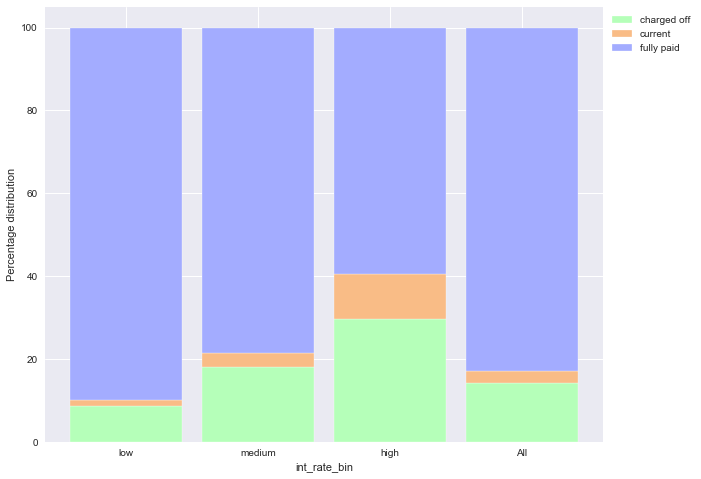

In [546]:
# Create loan status percentage plot based on int_rate_bin column.

loanstatus_percent_stackchart('int_rate_bin','small')

#### Analyse loan status based on annual income quartile

In [547]:
# Create new column annual_inc_bin
# which has values based on quartile 

print(pd.cut(loan['annual_inc'], 3).value_counts())
loan['annual_inc_bin'] = pd.cut(loan['annual_inc'], 3, labels=['low','medium','high'])
loan.head()

(-1996.0, 2002666.667]        39714
(2002666.667, 4001333.333]        2
(4001333.333, 6000000.0]          1
Name: annual_inc, dtype: int64


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_bin,annual_inc_bin
0,1077501,5000,5000,4975.0,36 MONTHS,10.65,162.87,B,B2,10+ YEARS,...,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,low,low
1,1077430,2500,2500,2500.0,60 MONTHS,15.27,59.83,C,C4,< 1 YEAR,...,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,medium,low
2,1077175,2400,2400,2400.0,36 MONTHS,15.96,84.33,C,C5,10+ YEARS,...,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,medium,low
3,1076863,10000,10000,10000.0,36 MONTHS,13.49,339.31,C,C1,10+ YEARS,...,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,medium,low
4,1075358,3000,3000,3000.0,60 MONTHS,12.69,67.79,B,B5,1 YEAR,...,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,medium,low


In [548]:
# Create pivot table using function to show percentage of different loan_status

loan_annual_inc_bin=loanstatus_pivot_percent("annual_inc_bin")
loan_annual_inc_bin

id                          
loan_status    CHARGED OFF CURRENT FULLY PAID    All
annual_inc_bin                                      
low                  14.17    2.87      82.96  100.0
medium                0.00    0.00     100.00  100.0
high                  0.00    0.00     100.00  100.0
All                  14.17    2.87      82.96  100.0

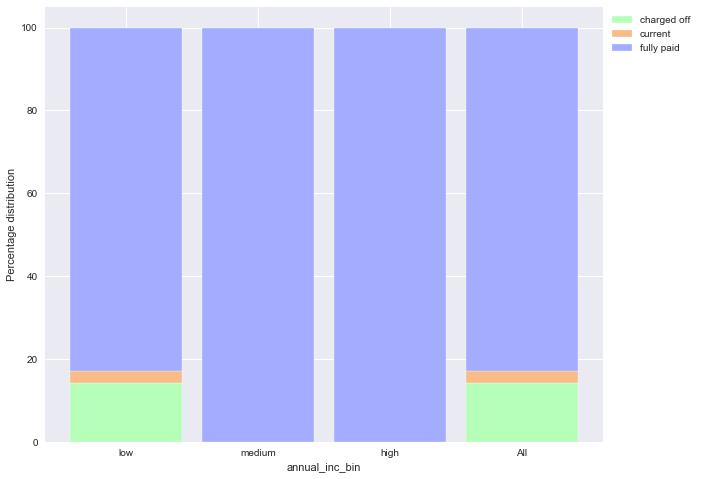

In [549]:
# Create loan status percentage plot based on annual_inc_bin column  

loanstatus_percent_stackchart('annual_inc_bin','small')

#### Analyse loan status based on loan_amnt quartile

In [550]:
# create new column loan_amnt_bin
# which has values based on quartile

print(pd.cut(loan['loan_amnt'], 3).value_counts())
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'], 3, labels=['low','medium','high'])
loan.head()

(465.5, 12000.0]      26121
(12000.0, 23500.0]     9904
(23500.0, 35000.0]     3692
Name: loan_amnt, dtype: int64


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_bin,annual_inc_bin,loan_amnt_bin
0,1077501,5000,5000,4975.0,36 MONTHS,10.65,162.87,B,B2,10+ YEARS,...,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,low,low,low
1,1077430,2500,2500,2500.0,60 MONTHS,15.27,59.83,C,C4,< 1 YEAR,...,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,medium,low,low
2,1077175,2400,2400,2400.0,36 MONTHS,15.96,84.33,C,C5,10+ YEARS,...,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,medium,low,low
3,1076863,10000,10000,10000.0,36 MONTHS,13.49,339.31,C,C1,10+ YEARS,...,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,medium,low,low
4,1075358,3000,3000,3000.0,60 MONTHS,12.69,67.79,B,B5,1 YEAR,...,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,medium,low,low


In [551]:
# Create pivot table using function to show percentage of different loan_status

loan_amnt_bin=loanstatus_pivot_percent("loan_amnt_bin")
loan_amnt_bin

id                          
loan_status   CHARGED OFF CURRENT FULLY PAID    All
loan_amnt_bin                                      
low                 13.07    1.39      85.54  100.0
medium              15.41    5.03      79.56  100.0
high                18.58    7.56      73.86  100.0
All                 14.17    2.87      82.96  100.0

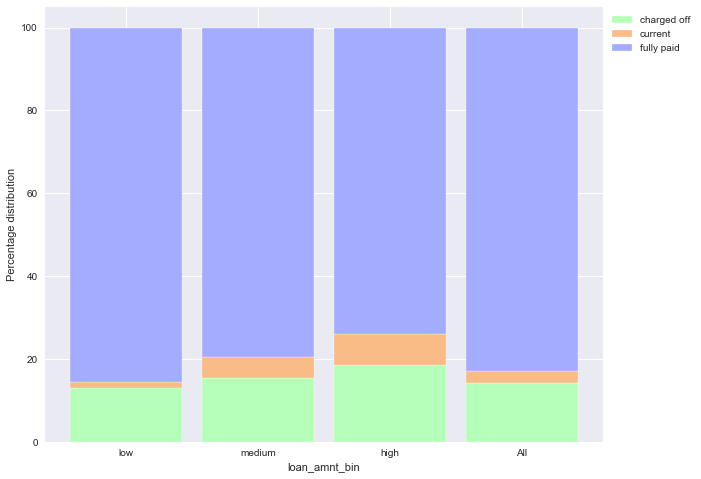

In [552]:
# Create loan status percentage plot based on loan_amnt_bin column  

loanstatus_percent_stackchart('loan_amnt_bin','small')

#### Analyse loan status based on dti quartile

In [553]:
# create new column dti_bin
# which has values based on quartile

print(pd.cut(loan['dti'], 3).value_counts())
loan['dti_bin'] = pd.cut(loan['dti'], 3, labels=['low','medium','high'])
loan.head()

(9.997, 19.993]    19001
(-0.03, 9.997]     13202
(19.993, 29.99]     7514
Name: dti, dtype: int64


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_bin,annual_inc_bin,loan_amnt_bin,dti_bin
0,1077501,5000,5000,4975.0,36 MONTHS,10.65,162.87,B,B2,10+ YEARS,...,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,low,low,low,high
1,1077430,2500,2500,2500.0,60 MONTHS,15.27,59.83,C,C4,< 1 YEAR,...,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,medium,low,low,low
2,1077175,2400,2400,2400.0,36 MONTHS,15.96,84.33,C,C5,10+ YEARS,...,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,medium,low,low,low
3,1076863,10000,10000,10000.0,36 MONTHS,13.49,339.31,C,C1,10+ YEARS,...,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,medium,low,low,high
4,1075358,3000,3000,3000.0,60 MONTHS,12.69,67.79,B,B5,1 YEAR,...,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,medium,low,low,medium


In [554]:
# Create pivot table using function to show percentage of different loan_status

loan_dti_bin=loanstatus_pivot_percent("dti_bin")
loan_dti_bin

id                          
loan_status CHARGED OFF CURRENT FULLY PAID    All
dti_bin                                          
high              12.32    2.25      85.43  100.0
low               14.70    2.91      82.39  100.0
medium            16.08    3.86      80.06  100.0
All               14.17    2.87      82.96  100.0

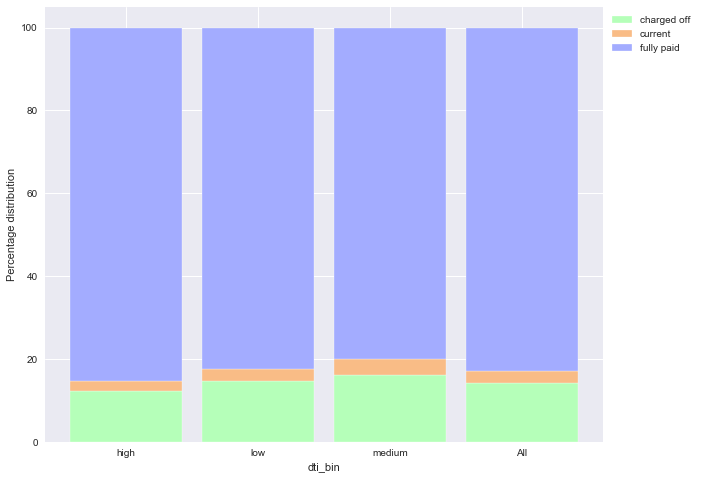

In [555]:
# Create loan status percentage plot based on dti_bin column  

loanstatus_percent_stackchart('dti_bin','small')

#### Analyse loan status based on mths_since_last_delinq quartile

In [556]:
# create new column mths_since_last_delinq_bin
# which has values based on quartile 

print(pd.cut(loan['mths_since_last_delinq'], 3).value_counts())
loan['mths_since_last_delinq_bin'] = pd.cut(loan['mths_since_last_delinq'], 3, labels=['old','intermediate','new'])
loan.head()

(-0.12, 40.0]    8451
(40.0, 80.0]     5421
(80.0, 120.0]     163
Name: mths_since_last_delinq, dtype: int64


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_bin,annual_inc_bin,loan_amnt_bin,dti_bin,mths_since_last_delinq_bin
0,1077501,5000,5000,4975.0,36 MONTHS,10.65,162.87,B,B2,10+ YEARS,...,0.00,2015-01-01,171.62,2016-05-01,0.0,low,low,low,high,NaN
1,1077430,2500,2500,2500.0,60 MONTHS,15.27,59.83,C,C4,< 1 YEAR,...,1.11,2013-04-01,119.66,2013-09-01,0.0,medium,low,low,low,NaN
2,1077175,2400,2400,2400.0,36 MONTHS,15.96,84.33,C,C5,10+ YEARS,...,0.00,2014-06-01,649.91,2016-05-01,0.0,medium,low,low,low,NaN
3,1076863,10000,10000,10000.0,36 MONTHS,13.49,339.31,C,C1,10+ YEARS,...,0.00,2015-01-01,357.48,2016-04-01,0.0,medium,low,low,high,old
4,1075358,3000,3000,3000.0,60 MONTHS,12.69,67.79,B,B5,1 YEAR,...,0.00,2016-05-01,67.79,2016-05-01,0.0,medium,low,low,medium,old


In [557]:
# As you can observe in above data set there are some NA values in this column 
# And here NA means never commited crime as discussed in data cleaning part
# So let's replace NA with never in this column 

loan['mths_since_last_delinq_bin'] = loan['mths_since_last_delinq_bin'].cat.add_categories('never')
loan['mths_since_last_delinq_bin'].fillna('never', inplace =True)
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_bin,annual_inc_bin,loan_amnt_bin,dti_bin,mths_since_last_delinq_bin
0,1077501,5000,5000,4975.0,36 MONTHS,10.65,162.87,B,B2,10+ YEARS,...,0.00,2015-01-01,171.62,2016-05-01,0.0,low,low,low,high,never
1,1077430,2500,2500,2500.0,60 MONTHS,15.27,59.83,C,C4,< 1 YEAR,...,1.11,2013-04-01,119.66,2013-09-01,0.0,medium,low,low,low,never
2,1077175,2400,2400,2400.0,36 MONTHS,15.96,84.33,C,C5,10+ YEARS,...,0.00,2014-06-01,649.91,2016-05-01,0.0,medium,low,low,low,never
3,1076863,10000,10000,10000.0,36 MONTHS,13.49,339.31,C,C1,10+ YEARS,...,0.00,2015-01-01,357.48,2016-04-01,0.0,medium,low,low,high,old
4,1075358,3000,3000,3000.0,60 MONTHS,12.69,67.79,B,B5,1 YEAR,...,0.00,2016-05-01,67.79,2016-05-01,0.0,medium,low,low,medium,old


In [558]:
# Create pivot table using function to show percentage of different loan_status

loan_mths_since_last_delinq_bin=loanstatus_pivot_percent("mths_since_last_delinq_bin")
loan_mths_since_last_delinq_bin

id                          
loan_status                CHARGED OFF CURRENT FULLY PAID    All
mths_since_last_delinq_bin                                      
never                            14.83    2.58      82.59  100.0
old                              15.79    2.64      81.57  100.0
intermediate                     20.25    1.23      78.53  100.0
new                              13.57    3.03      83.40  100.0
All                              14.17    2.87      82.96  100.0

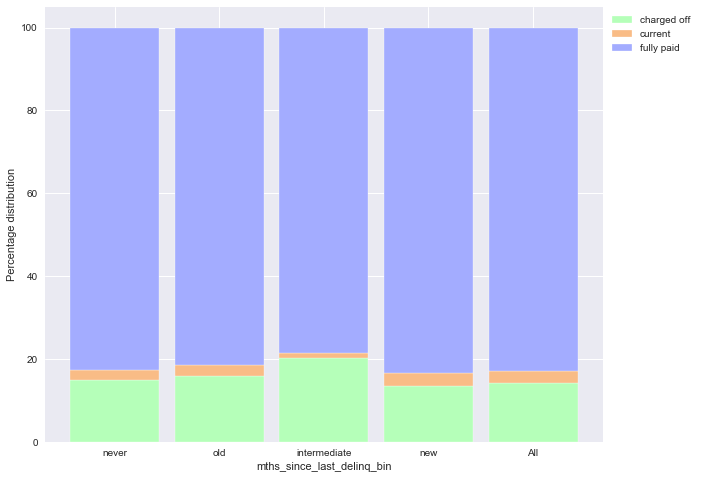

In [559]:
# Create loan status percentage plot based on mths_since_last_delinq_bin column 

loanstatus_percent_stackchart('mths_since_last_delinq_bin','small')

#### Analyse loan status based on open_acc quartile

In [560]:
# create new column open_acc_bin
# which has values based on quartile 

print(pd.cut(loan['open_acc'], 3).value_counts())
loan['open_acc_bin'] = pd.qcut(loan['open_acc'], 3, ['low','medium','high'])
loan.head()

(1.958, 16.0]    36999
(16.0, 30.0]      2688
(30.0, 44.0]        30
Name: open_acc, dtype: int64


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_bin,annual_inc_bin,loan_amnt_bin,dti_bin,mths_since_last_delinq_bin,open_acc_bin
0,1077501,5000,5000,4975.0,36 MONTHS,10.65,162.87,B,B2,10+ YEARS,...,2015-01-01,171.62,2016-05-01,0.0,low,low,low,high,never,low
1,1077430,2500,2500,2500.0,60 MONTHS,15.27,59.83,C,C4,< 1 YEAR,...,2013-04-01,119.66,2013-09-01,0.0,medium,low,low,low,never,low
2,1077175,2400,2400,2400.0,36 MONTHS,15.96,84.33,C,C5,10+ YEARS,...,2014-06-01,649.91,2016-05-01,0.0,medium,low,low,low,never,low
3,1076863,10000,10000,10000.0,36 MONTHS,13.49,339.31,C,C1,10+ YEARS,...,2015-01-01,357.48,2016-04-01,0.0,medium,low,low,high,old,medium
4,1075358,3000,3000,3000.0,60 MONTHS,12.69,67.79,B,B5,1 YEAR,...,2016-05-01,67.79,2016-05-01,0.0,medium,low,low,medium,old,high


In [561]:
# Create pivot table using function to show percentage of different loan_status

loan_open_acc_bin=loanstatus_pivot_percent("open_acc_bin")
loan_open_acc_bin

id                          
loan_status  CHARGED OFF CURRENT FULLY PAID    All
open_acc_bin                                      
low                14.59    2.28      83.13  100.0
medium             14.03    3.22      82.75  100.0
high               13.73    3.28      82.99  100.0
All                14.17    2.87      82.96  100.0

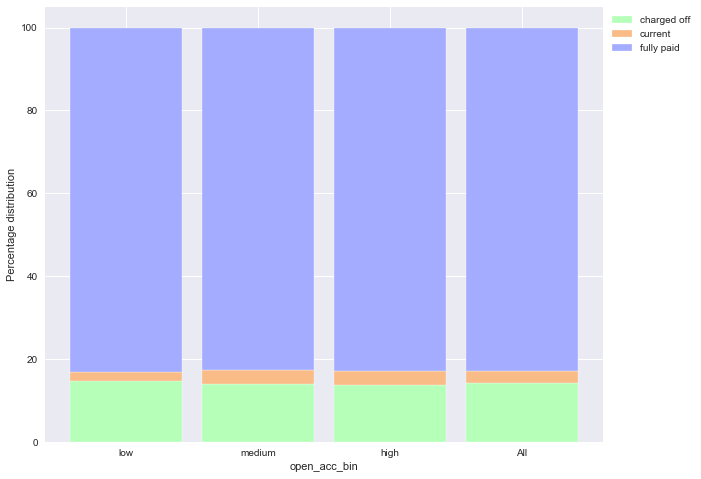

In [562]:
# Create loan status percentage plot based on open_acc_bin column 

loanstatus_percent_stackchart('open_acc_bin','small')

#### Analyse loan status based on delinq_2yrs quartile

In [563]:
# create function to add different groups in column

def delinq_2yrs_bin(x):
    'divide the delinq_2yrs_bin four categories'
    if x <= 0:
        return "0"
    elif 0 < x <= 3:
        return "1-3"
    elif 3 < x <= 7:
        return "3-7"
    else:
        return "7+"

# create new column delinq_2yrs_bin
# which has values based on quartile 

loan['delinq_2yrs_bin'] = loan.delinq_2yrs.apply(lambda x: delinq_2yrs_bin(x))
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_bin,annual_inc_bin,loan_amnt_bin,dti_bin,mths_since_last_delinq_bin,open_acc_bin,delinq_2yrs_bin
0,1077501,5000,5000,4975.0,36 MONTHS,10.65,162.87,B,B2,10+ YEARS,...,171.62,2016-05-01,0.0,low,low,low,high,never,low,0
1,1077430,2500,2500,2500.0,60 MONTHS,15.27,59.83,C,C4,< 1 YEAR,...,119.66,2013-09-01,0.0,medium,low,low,low,never,low,0
2,1077175,2400,2400,2400.0,36 MONTHS,15.96,84.33,C,C5,10+ YEARS,...,649.91,2016-05-01,0.0,medium,low,low,low,never,low,0
3,1076863,10000,10000,10000.0,36 MONTHS,13.49,339.31,C,C1,10+ YEARS,...,357.48,2016-04-01,0.0,medium,low,low,high,old,medium,0
4,1075358,3000,3000,3000.0,60 MONTHS,12.69,67.79,B,B5,1 YEAR,...,67.79,2016-05-01,0.0,medium,low,low,medium,old,high,0


In [564]:
# Create pivot table using function to show percentage of different loan_status

loan_delinq_2yrs_bin=loanstatus_pivot_percent("delinq_2yrs_bin")
loan_delinq_2yrs_bin

id                          
loan_status     CHARGED OFF CURRENT FULLY PAID    All
delinq_2yrs_bin                                      
0                     13.94    2.88      83.18  100.0
1-3                   15.96    2.80      81.24  100.0
3-7                   18.37    3.06      78.57  100.0
7+                    25.00    0.00      75.00  100.0
All                   14.17    2.87      82.96  100.0

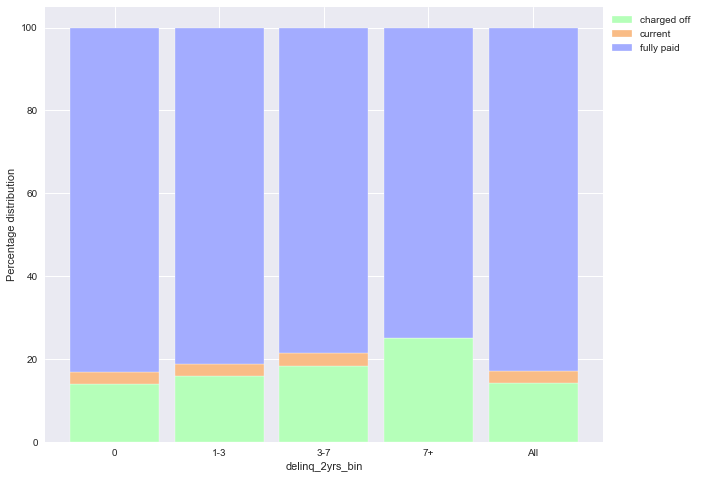

In [565]:
# Create loan status percentage plot based on delinq_2yrs_bin column 

loanstatus_percent_stackchart('delinq_2yrs_bin','small')

# Bivariate Analysis

In [566]:
# Finding the correlation between variables

loan_correlation = loan.corr()
loan_correlation

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
id,1.000000,0.141919,0.152286,0.249547,0.078831,0.086587,0.008731,0.095983,-0.008644,-0.042378,...,0.042149,0.140045,0.220838,0.112213,0.172856,-0.055082,0.033426,-0.013359,0.122365,-0.009505
loan_amnt,0.141919,1.000000,0.981578,0.940034,0.309415,0.930288,0.271149,0.066439,-0.031864,0.009229,...,0.256442,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,-0.037180
funded_amnt,0.152286,0.981578,1.000000,0.958422,0.312619,0.956159,0.266965,0.066283,-0.032355,0.009259,...,0.250589,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,-0.038502
funded_amnt_inv,0.249547,0.940034,0.958422,1.000000,0.306657,0.905039,0.254375,0.074689,-0.038501,-0.005712,...,0.242854,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,-0.042746
int_rate,0.078831,0.309415,0.312619,0.306657,1.000000,0.282703,0.053185,0.111162,0.157916,0.133013,...,-0.043570,0.308268,0.303670,0.186882,0.529913,0.092591,0.122259,0.066380,0.157775,0.082550
installment,0.086587,0.930288,0.956159,0.905039,0.282703,1.000000,0.270874,0.054186,-0.019657,0.009722,...,0.230824,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,-0.034103
annual_inc,0.008731,0.271149,0.266965,0.254375,0.053185,0.270874,1.000000,-0.122732,0.023083,0.033908,...,0.235771,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,-0.016801
dti,0.095983,0.066439,0.066283,0.074689,0.111162,0.054186,-0.122732,1.000000,-0.034452,0.001405,...,0.229881,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212,0.005691
delinq_2yrs,-0.008644,-0.031864,-0.032355,-0.038501,0.157916,-0.019657,0.023083,-0.034452,1.000000,0.008091,...,0.067892,-0.022695,-0.028976,-0.038795,0.023077,0.030609,0.012315,0.013912,-0.012149,0.003375
inq_last_6mths,-0.042378,0.009229,0.009259,-0.005712,0.133013,0.009722,0.033908,0.001405,0.008091,1.000000,...,0.111499,-0.010559,-0.020277,-0.023433,0.021774,0.031215,0.018972,0.012420,0.028514,0.016346


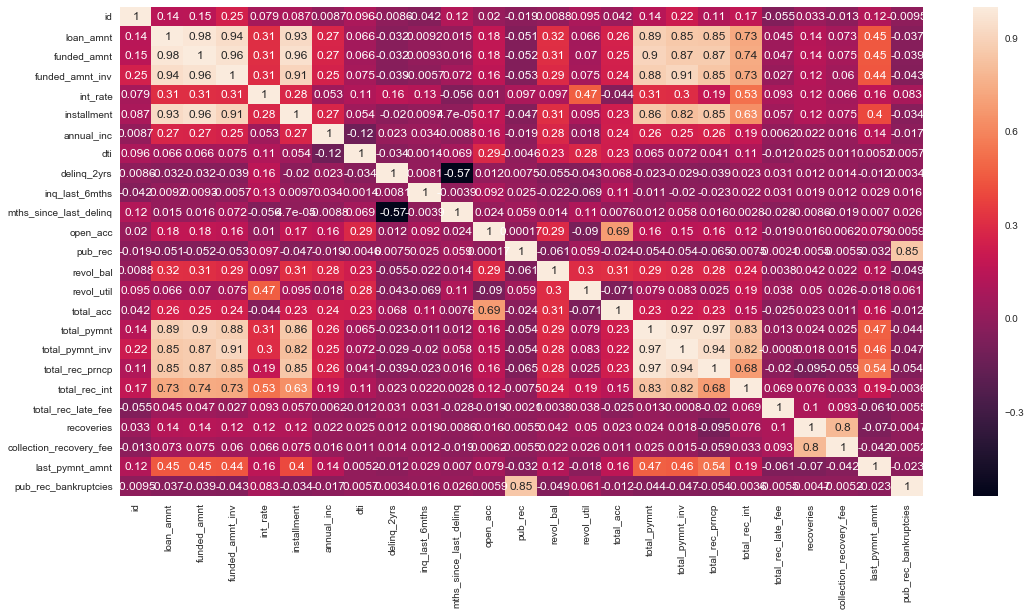

In [567]:
#Heatmap showing distribution of continous variables

ax = plt.subplots(figsize=(18, 9))
sns.heatmap(loan_correlation, xticklabels=loan_correlation.columns.values, yticklabels=loan_correlation.columns.values,annot= True)
plt.show()


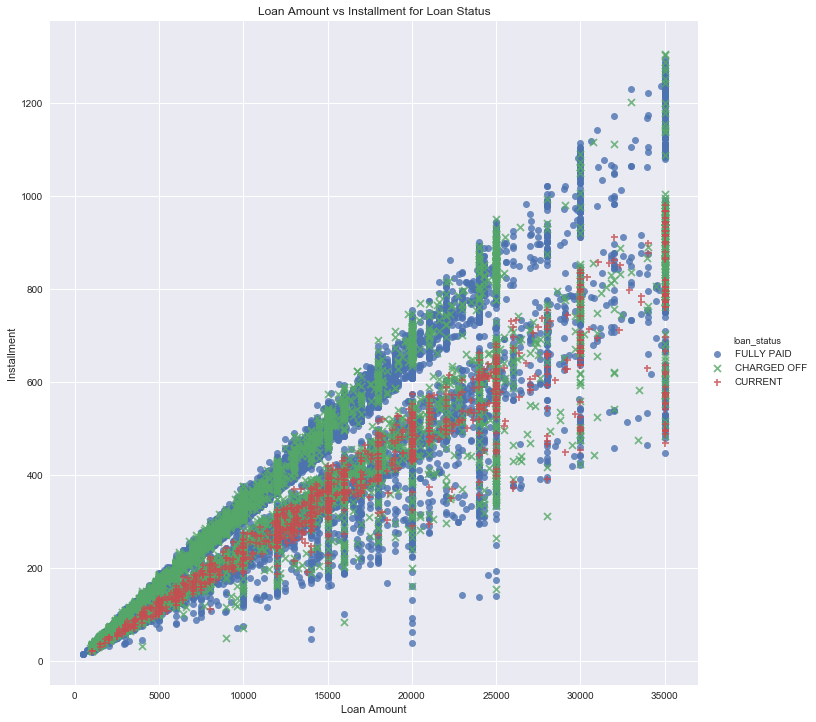

In [568]:
# Scatter plot for loan amount and installment with respect to loan status.

sns.lmplot( x='loan_amnt', y='installment', data=loan, fit_reg=False, hue ='loan_status', legend=True, markers=['o','x','+'], size=10)
plt.title('Loan Amount vs Installment for Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Installment')
plt.show()


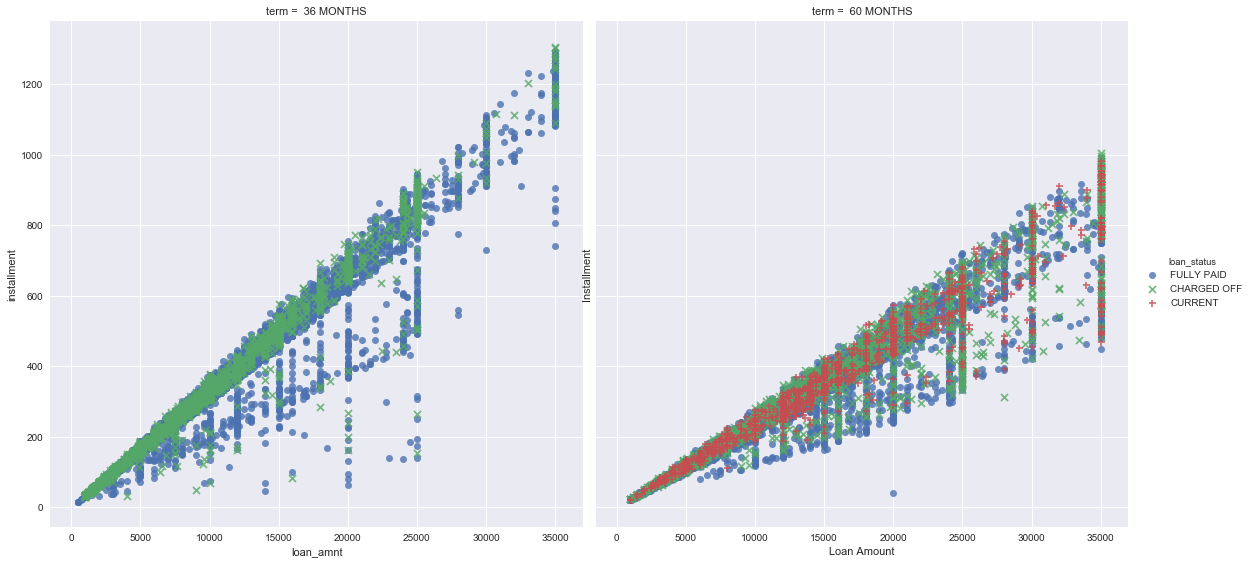

In [569]:
# From our past analysis we knew that we have more people going charged off at 60 months than at 36 months.
# Let check that variable with respect to above graph

sns.lmplot( x='loan_amnt', y='installment', data=loan, fit_reg=False, hue ='loan_status', legend=True, markers=['o','x','+'], size=8, col = 'term')
plt.xlabel('Loan Amount')
plt.ylabel('Installment')
plt.show()


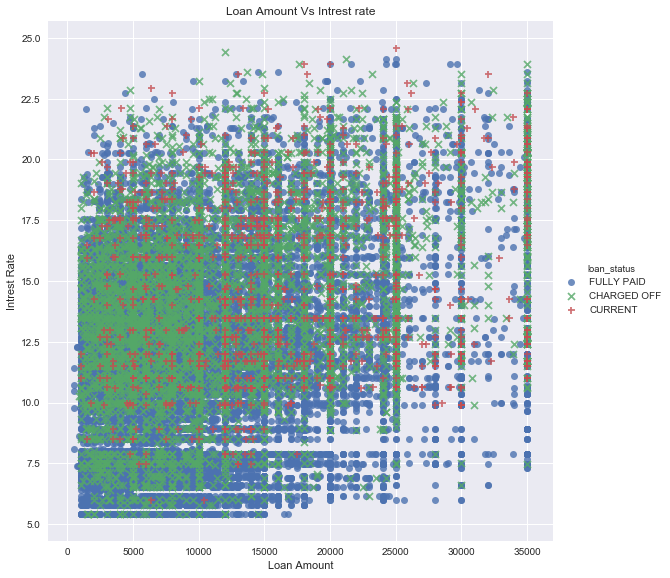

In [570]:
# Scatter plot for loan amount and intrest rate with respect to loan status.

sns.lmplot( x='loan_amnt', y='int_rate', data=loan, fit_reg=False, hue ='loan_status', legend=True, markers=['o','x','+'], size=8)
plt.title('Loan Amount Vs Intrest rate')
plt.xlabel('Loan Amount')
plt.ylabel('Intrest Rate')
plt.show()


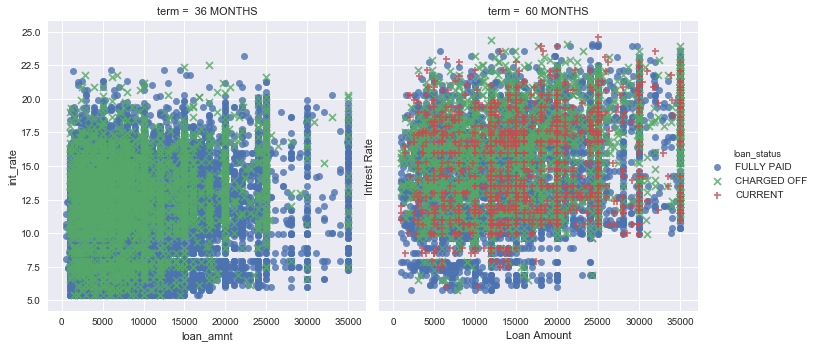

In [571]:
# Lets analyse the above variable with respect to different terms

sns.lmplot( x='loan_amnt', y='int_rate', data=loan, fit_reg=False, hue ='loan_status', legend=True, markers=['o','x','+'], col='term')
plt.xlabel('Loan Amount')
plt.ylabel('Intrest Rate')
plt.show()


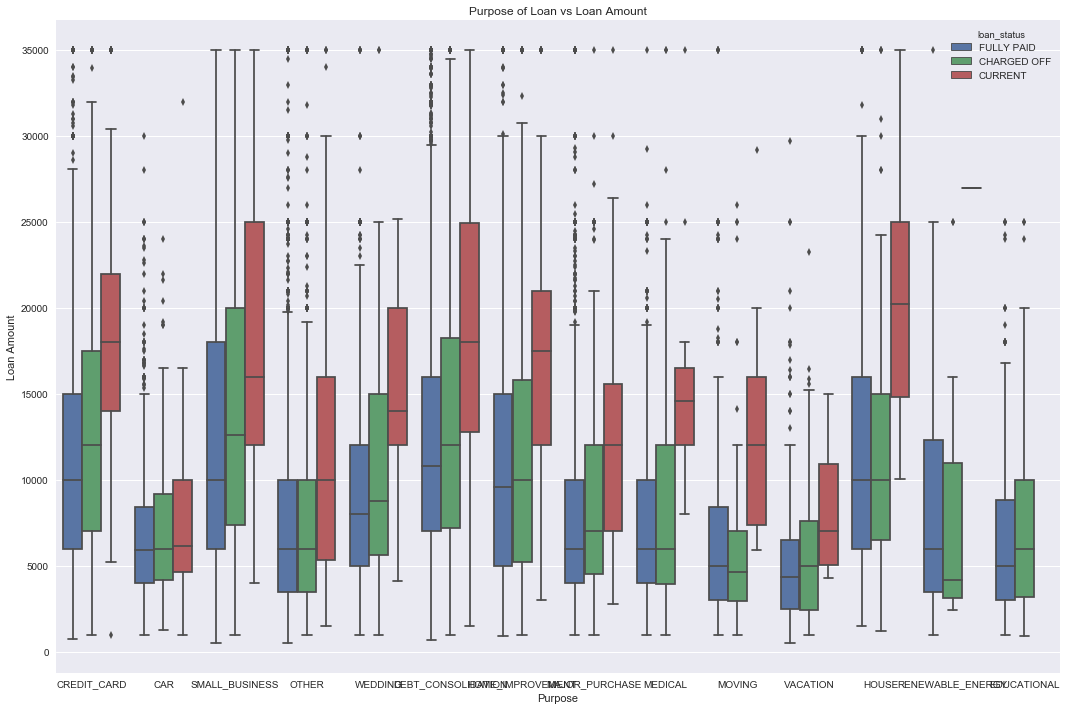

In [572]:
# Box plot for loan amount and purpose with respect to loan status.

plt.figure(figsize=(18,12))
sns.boxplot(x='purpose', y='loan_amnt', hue ='loan_status',data =loan)
plt.title('Purpose of Loan vs Loan Amount')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.show()


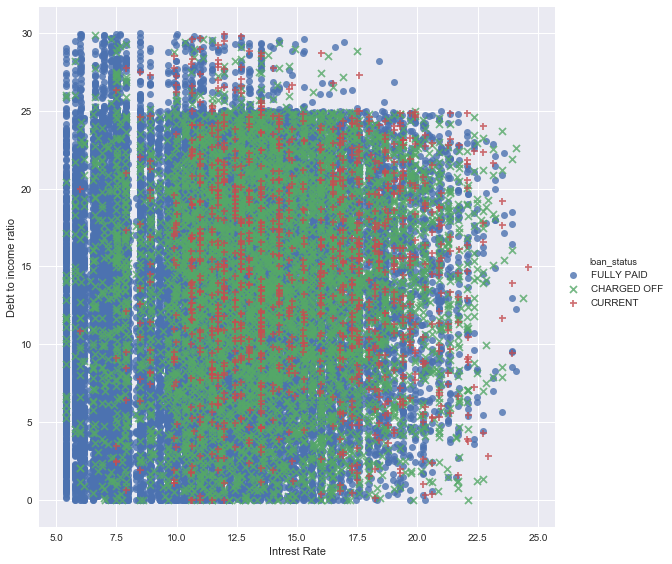

In [573]:
# Scatter plot for intrest rate and debt to income with respect to loan status.

sns.lmplot( x='int_rate', y='dti', data=loan, fit_reg=False, hue ='loan_status', legend=True,markers=['o','x','+'], size=8)
plt.xlabel('Intrest Rate')
plt.ylabel('Debt to income ratio')
plt.show()


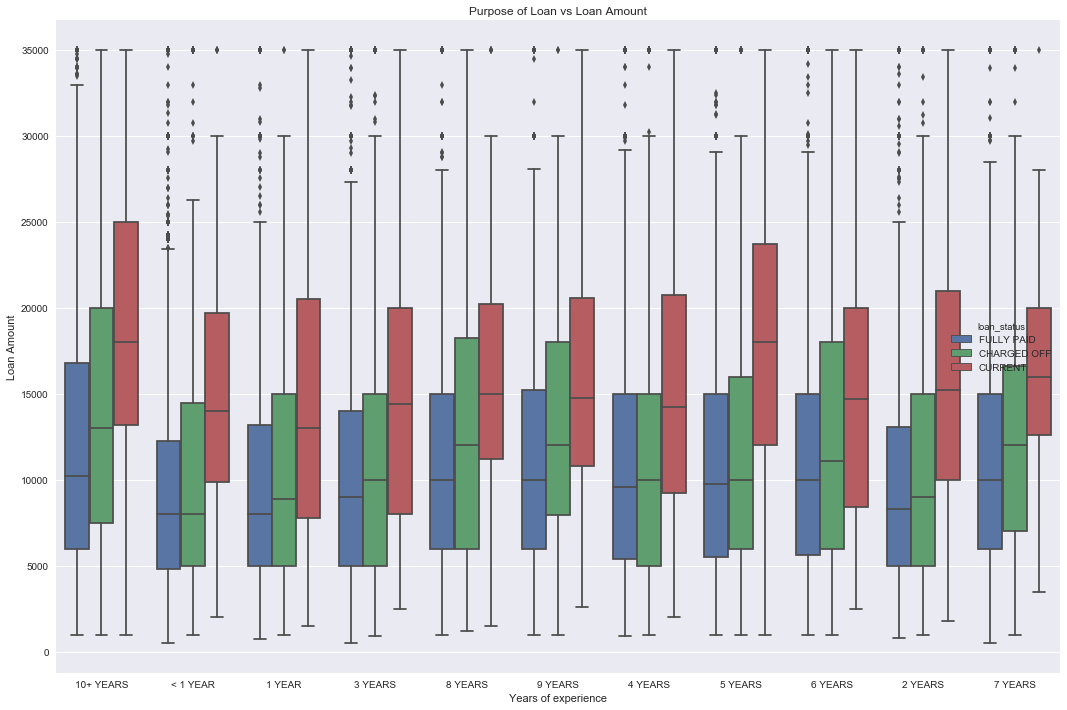

In [574]:
# Box plot for loan amount and years of experience with respect to loan status.

plt.figure(figsize=(18,12))
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status',data=loan)
plt.title('Purpose of Loan vs Loan Amount')
plt.xlabel('Years of experience')
plt.ylabel('Loan Amount')
plt.show()


In [575]:
print(loan.groupby('grade')['sub_grade'].value_counts())

grade  sub_grade
A      A4           2886
       A5           2742
       A3           1810
       A2           1508
       A1           1139
B      B3           2917
       B5           2704
       B4           2512
       B2           2057
       B1           1830
C      C1           2136
       C2           2011
       C3           1529
       C4           1236
       C5           1186
D      D2           1348
       D3           1173
       D4            981
       D1            931
       D5            874
E      E1            763
       E2            656
       E3            553
       E4            454
       E5            416
F      F1            329
       F2            249
       F3            185
       F4            168
       F5            118
G      G1            104
       G2             78
       G4             56
       G3             48
       G5             30
Name: sub_grade, dtype: int64


In [576]:
# It is clear from the data that:
# sub grade a1-a5 is in grade A
# sub grade b1-b5 is in grade B
# sub grade c1-c5 is in grade C
# sub grade d1-d5 is in grade D
# sub grade e1-e5 is in grade E
# sub grade f1-f5 is in grade F
# sub grade g1-g5 is in grade G
    
#Let create a new column based on this for analysis purpose

loan['sub_grade_num'] = loan['sub_grade'].str[1]
print(loan[['sub_grade','sub_grade_num']].head())


  sub_grade sub_grade_num
0        B2             2
1        C4             4
2        C5             5
3        C1             1
4        B5             5


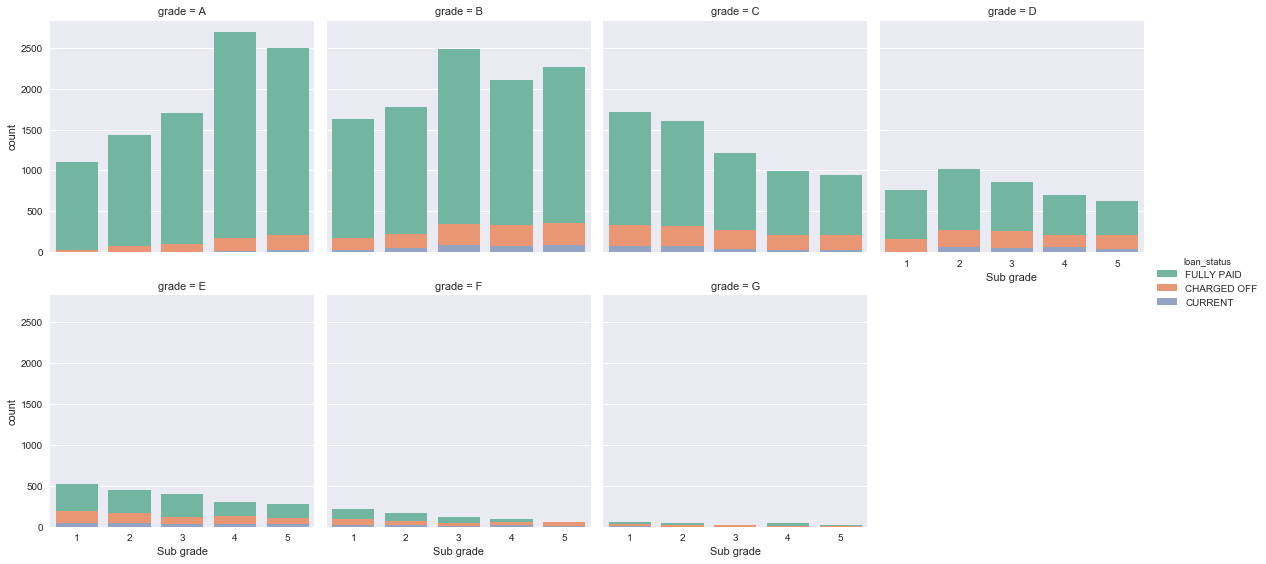

In [577]:
x = sns.factorplot(x = 'sub_grade_num',  col = 'grade', col_wrap = 4, hue= 'loan_status', data = loan, kind = 'count', dodge = False, palette='Set2', col_order = ['A','B','C','D','E','F','G'])
x.set_axis_labels("Sub grade")
plt.show()

Conclusion:

Based on the analysis conducted across multiple variables, following variables were found to be impacting the variations for loan status.
Grades
Sub Grades
Address State
Verification Status
Term of Loan
Purpose of Loan
Interest Rate Quartile
Loan Amount Quartile
Delinquency in past two years
Purpose of Loan and Loan amount (bivariate)

The suggestions have been provided corresponding to each findings and classified segments.
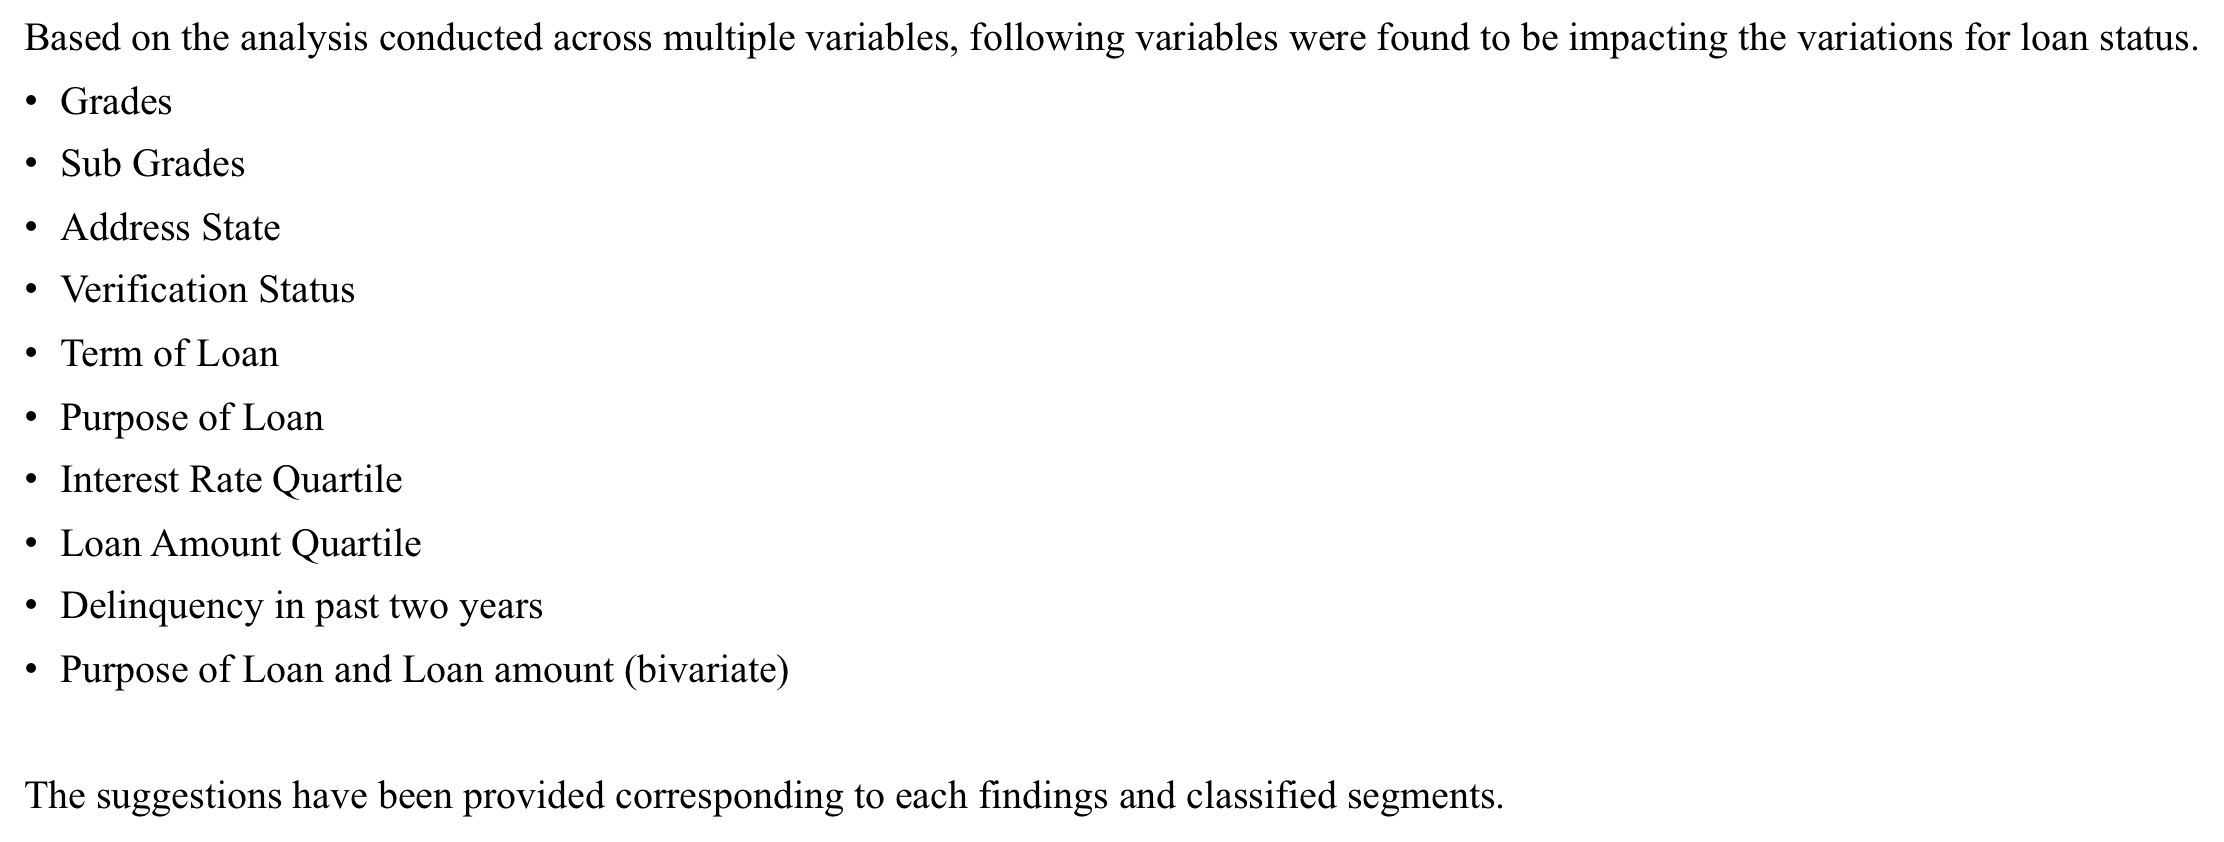